# 0. Introducción
The Iris Dataset includes 3 Iris Species with 50 samples each (150 rows) and is composed of 6 columns :

the ID column
4 columns of measures on Sepal and Petal : SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
the column containing the labels : Iris-setosa, Iris-versicolor, Iris-virginica
The objective is to build a model that uses the features to classify the flowers with a maximum of accuracy. In order to reach this goal, we are going to perform an exploratory data analysis to understand the data and choose the best features. Then we will build a random forest model and try to improve its performance firstly by dropping out the less interesting feature and secondly by using the linear discriminant analysis technic which allows to optimize class separability.

Instructor:
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe

# 1. Ajustes Iniciales

## 1.1 Importar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

# 2. Carga de Dataset y Preprocesamiento

## 2.1. Lectura de CSV

In [59]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [60]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [61]:
df.rename({'SepalLengthCm':'sepal_l',
           'SepalWidthCm':'sepal_w',
           'PetalLengthCm':'petal_l',
           'PetalWidthCm':'petal_w',
           'Species':'species'},
          axis=1, inplace=True)

In [68]:
df.drop('Id', axis=1, inplace=True)

In [87]:
df.head(7)

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


## 2.3. Exploración inicial del dataframe

In [70]:
df.shape

(150, 5)

In [72]:
#Checking the balance of dataset
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [73]:
#Checking missing values
df.isnull().sum(axis=0)

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

In [81]:
#Estimating Skewness
df.drop('species', axis=1).skew()

sepal_l    0.314911
sepal_w    0.334053
petal_l   -0.274464
petal_w   -0.104997
dtype: float64

In [79]:
#Estimating Kurtosis
df.drop('species', axis=1).kurt()

sepal_l   -0.552064
sepal_w    0.290781
petal_l   -1.401921
petal_w   -1.339754
dtype: float64

# 3. Analisis Univariado

## 3.1. Estadisticas de cada columna númerica

In [91]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3.2. Longitud del sépalo [cm]

The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35

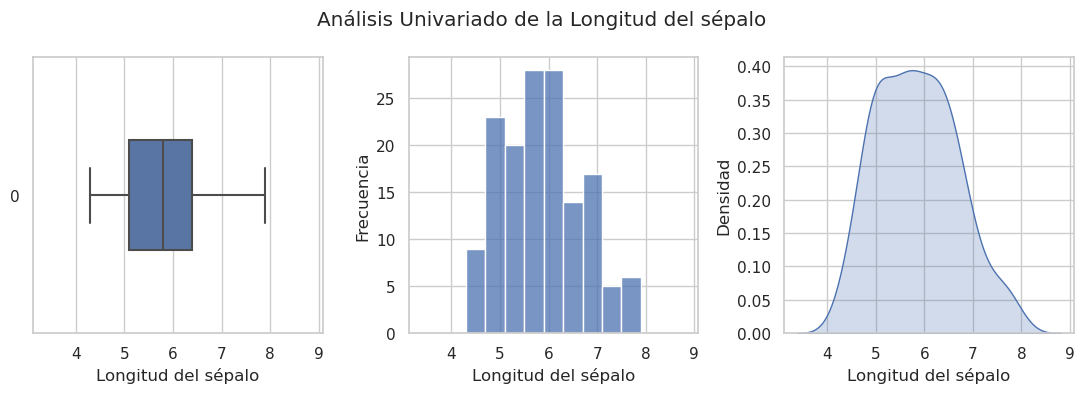

In [92]:
var = 'sepal_l'
var_title = 'Longitud del sépalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

#Plot the boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plot the histogram
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plot the density plot
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## 3.3. Ancho del sépalo [cm]

The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.

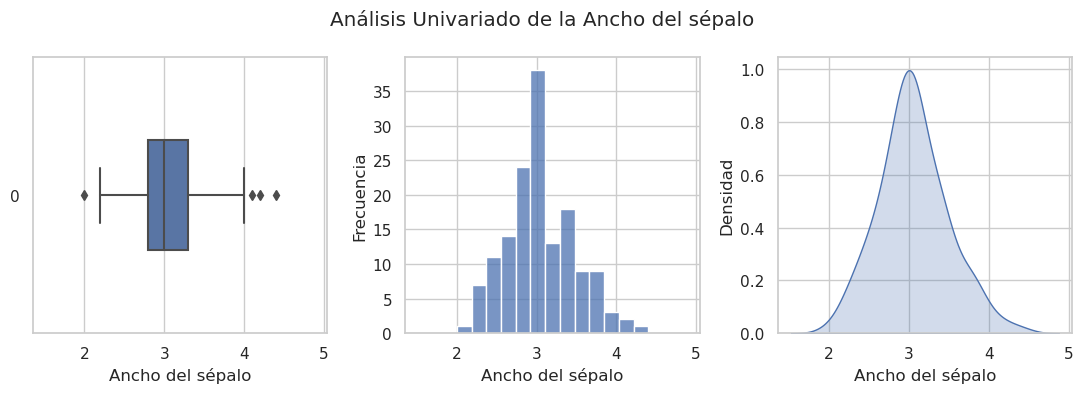

In [93]:
var = 'sepal_w'
var_title = 'Ancho del sépalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

#Plot the boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plot the histogram
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plot the density plot
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## 3.4. Longitud del pétalo [cm]

The Highest frequency of petal length is between 0 to 0.5 which is around 50.

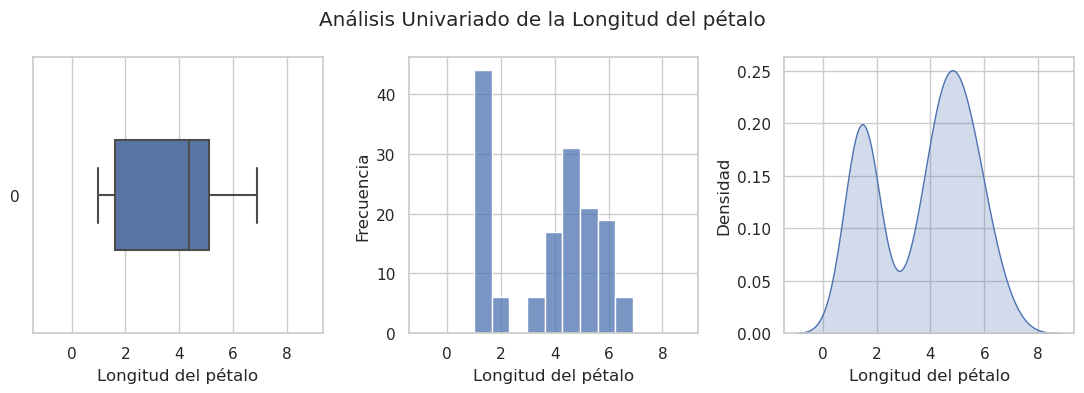

In [94]:
var = 'petal_l'
var_title = 'Longitud del pétalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

#Plot the boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plot the histogram
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plot the density plot
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## 3.5. Ancho del pétalo [cm]

The Highest frequency of petal width is between 0 to 0.5 which is around 50.

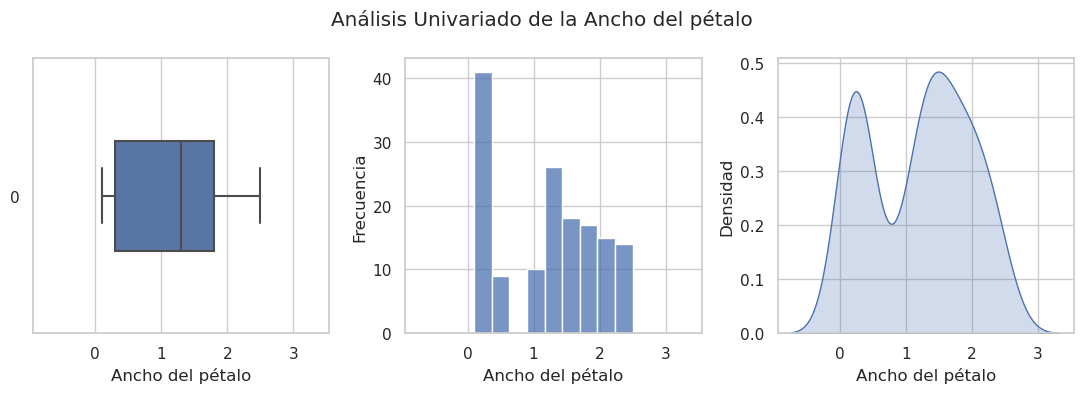

In [95]:
var = 'petal_w'
var_title = 'Ancho del pétalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

#Plot the boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plot the histogram
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plot the density plot
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# 4. Análisis Multivariado

In [97]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [99]:
filt = (df['species'] == 'Iris-setosa')
df_setosa = df.loc[filt]

In [100]:
filt = (df['species'] == 'Iris-versicolor')
df_versicolor = df.loc[filt]

In [101]:
filt = (df['species'] == 'Iris-virginica')
df_virginica = df.loc[filt]

## 4.1. SepalLengthCm vs Species

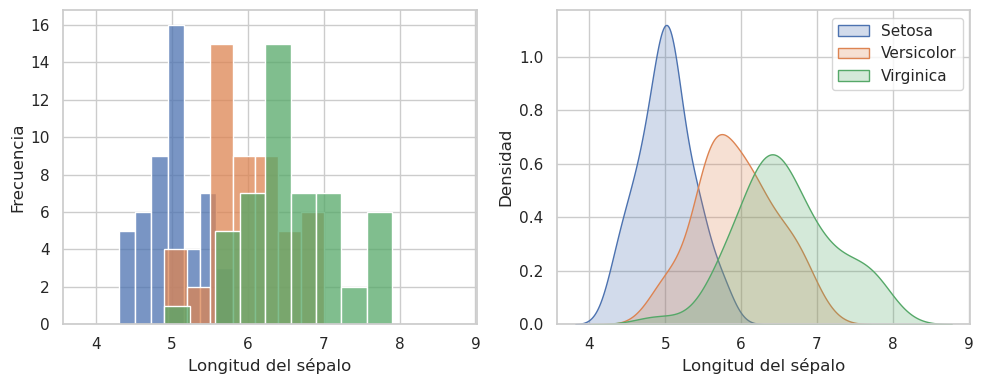

In [102]:
var = 'sepal_l'
var_title = 'Longitud del sépalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograms for each species
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# KDE plots for each species
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

ax[1].legend()
plt.tight_layout()

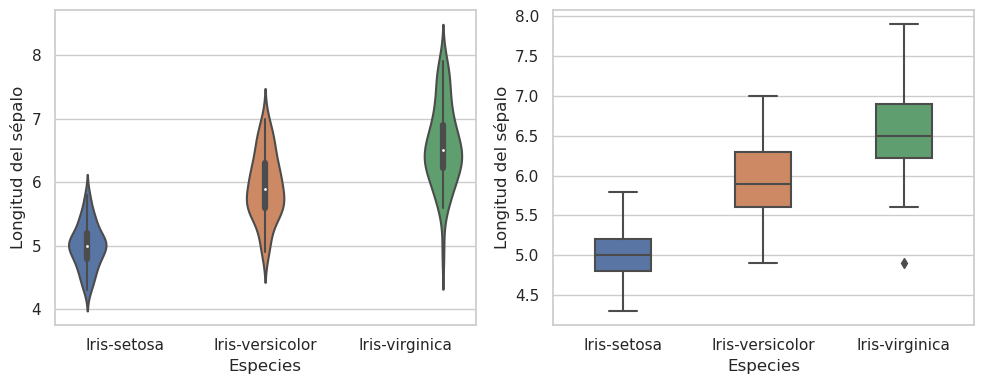

In [131]:
var = 'sepal_l'
var_title = 'Longitud del sépalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plot the Swarmplot
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plot the Boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

Comments:

According to these different plots, the sepal length seems to be quite an interesting feature to use in order to classify the different species. Indeed :

the sepal length of Iris-setosa flowers is mainly smaller than the petal length of the two other species
even if the difference of sepal length is less clear between Iris-versicolor and Iris-virginica, the sepal length of Iris-versicolor flowers is mainly smaller than the sepal length of Iris-virginica flowers

We see it is quite tough to separate the species on the basis of sepal_length alone.

## 4.2. SepalWidthCm vs Species

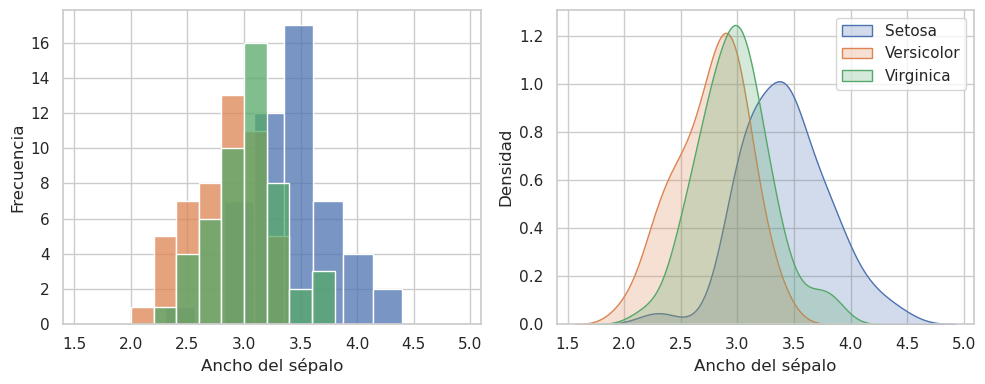

In [114]:
var = 'sepal_w'
var_title = 'Ancho del sépalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograms for each species
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# KDE plots for each species
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

ax[1].legend()
plt.tight_layout()

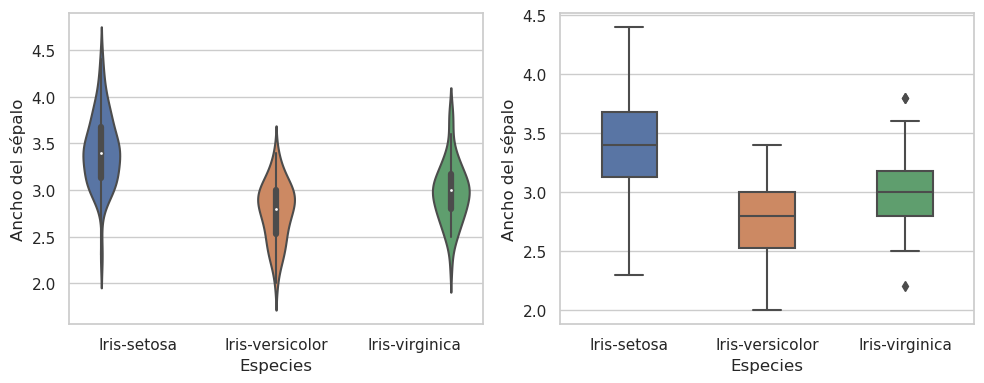

In [132]:
var = 'sepal_w'
var_title = 'Ancho del sépalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plot the Swarmplot
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plot the Boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

Comments:

According to these different plots, the sepal width seems to be the less interesting feature to use in order to classify the different species. Indeed :

the sepal width of the Iris-setosa flowers seems to be larger than the sepal width of Iris-versicolor and Iris-virginica but for many samples this difference of size is not true
the sepal width of the Iris-virginica flowers seems to be larger than the sepal width of Iris-versicolor but for many samples this difference of size is not true

While the overlapping of species is more intense in the case of sepal_width

## 4.3. PetalLengthCm vs Species

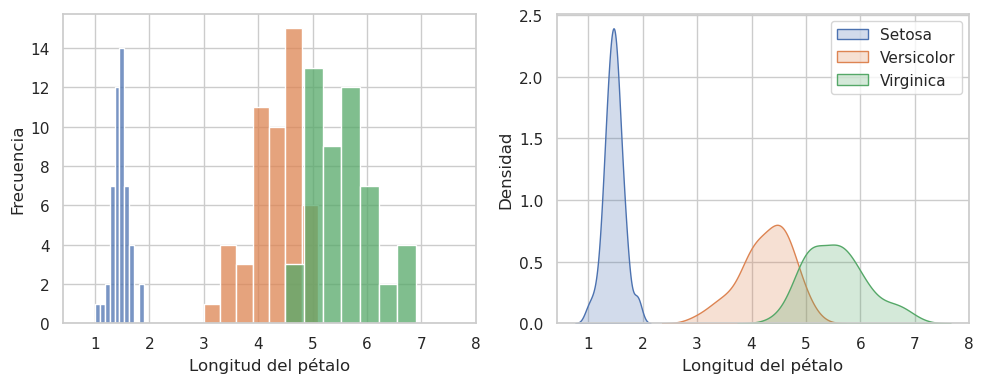

In [116]:
var = 'petal_l'
var_title = 'Longitud del pétalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograms for each species
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# KDE plots for each species
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

ax[1].legend()
plt.tight_layout()

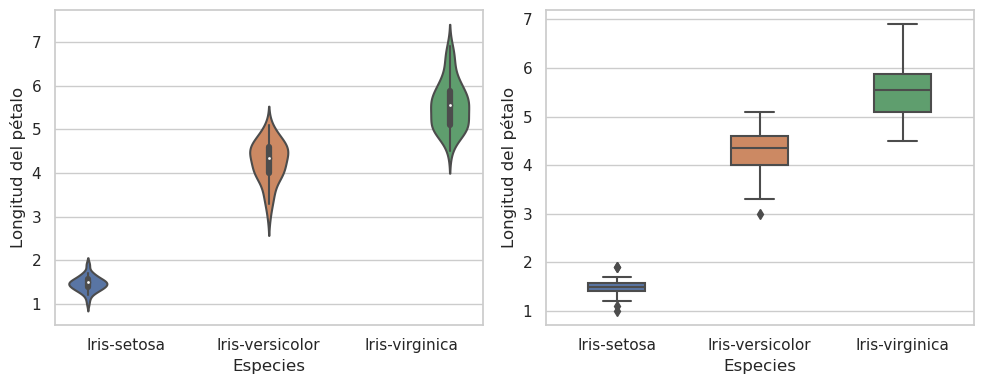

In [130]:
var = 'petal_l'
var_title = 'Longitud del pétalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plot the Swarmplot
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plot the Boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

Comments:

According to these different plots, the petal length seems to be an interesting feature to use in order to classify the different species. Indeed :

the petal length of Iris-setosa flowers is clearly smaller than the petal length of the two other species
even if the difference of petal length is less clear between Iris-versicolor and Iris-virginica, the petal length of Iris-versicolor flowers is mainly smaller than the petal length of Iris-virginica flowers

Again we see that on the basis of petal length setosa is separable while the other two are still overlapping.

## 4.4. PetalWidthCm vs Species

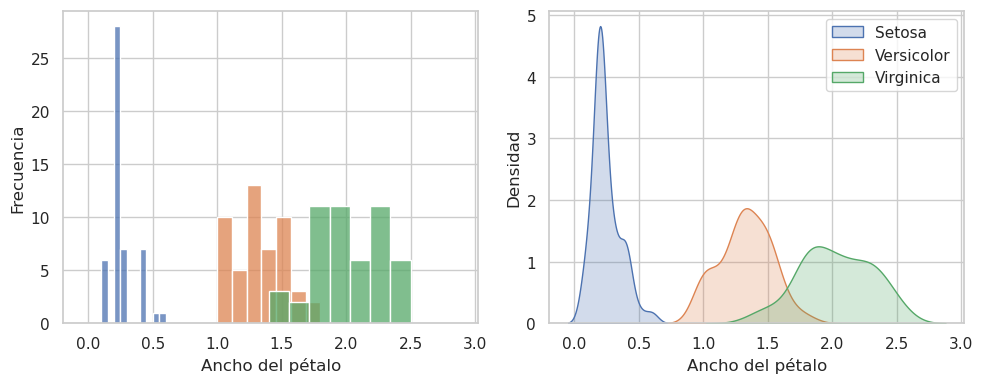

In [120]:
var = 'petal_w'
var_title = 'Ancho del pétalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograms for each species
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# KDE plots for each species
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

ax[1].legend()
plt.tight_layout()

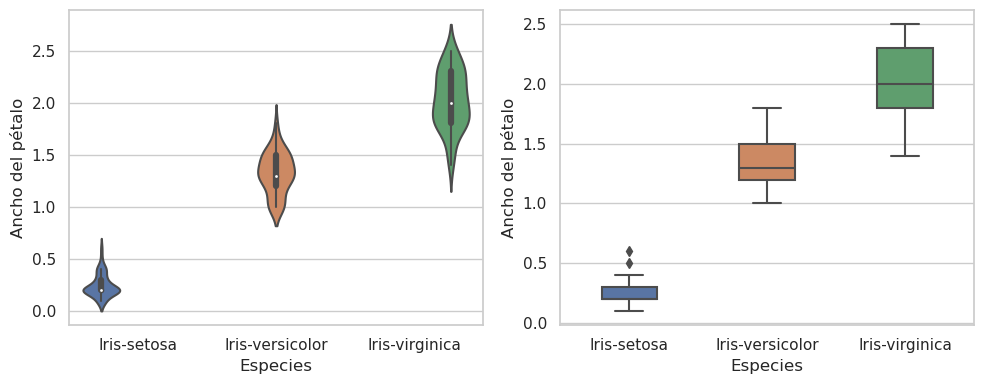

In [133]:
var = 'petal_w'
var_title = 'Ancho del pétalo'

# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plot the Swarmplot
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plot the Boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

Comments:

According to these different plots, the petal width seems to be an interesting feature to use in order to classify the different species. Indeed :

the petal width of Iris-setosa flowers is clearly smaller than the petal width of the two other species
even if the difference of petal width is less clear between Iris-versicolor and Iris-virginica, the petal width of Iris-versicolor flowers is mainly smaller than the petal width of Iris-virginica flowers

We see the setosa is easily separable while some portions of Versicolor and virginica are mixed.

## 4.5. All features vs All features vs Species

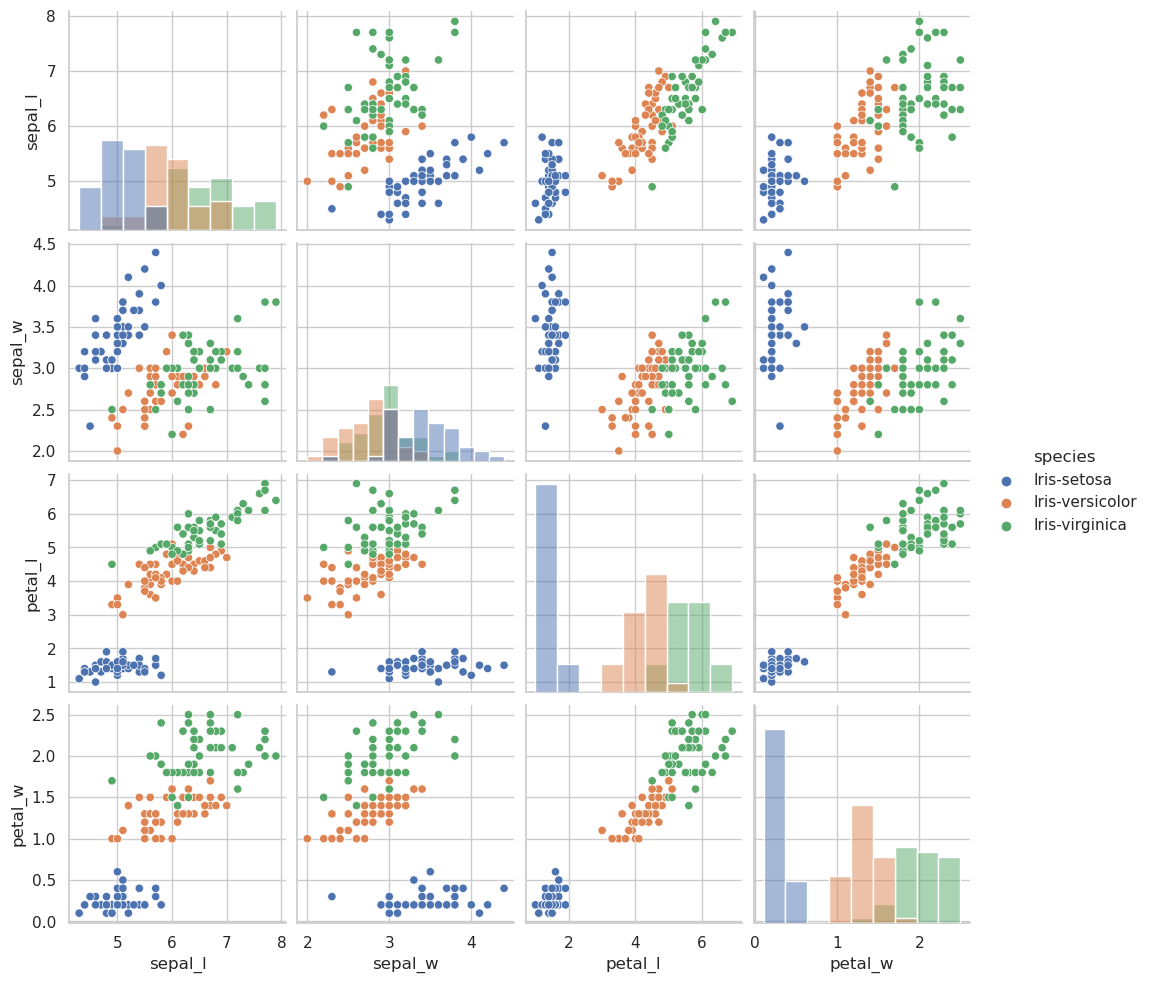

In [122]:
sns.pairplot(df, hue="species", diag_kind="hist")

## 4.6 Correlation Between Variables

In [134]:
df.corr()

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1.000000,-0.109369,0.871754,0.817954
sepal_w,-0.109369,1.000000,-0.420516,-0.356544
petal_l,0.871754,-0.420516,1.000000,0.962757
petal_w,0.817954,-0.356544,0.962757,1.000000


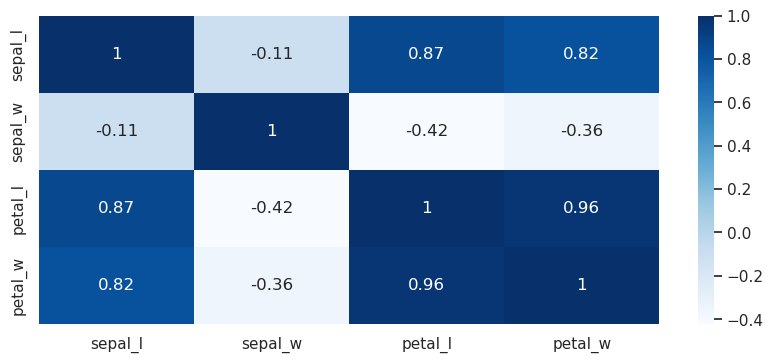

In [137]:
fig = plt.figure(figsize = (10,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

Interpretation

Diagonal values and upper triangle are ignored (melted the upper triangle through np.tril and df.where).Naturally, we find:

a high positive correlation between PetalWidth and PetalLength (0.96)

a high positive correlation between PetalLength and SepalLength (0.87)

a high positive correlation between PetalWidth and SepalLength (0.81)

As such, we observe correlations between these main attributes: PetalWidth, PetalLength and SepalLength.

Theory

PCC is:

1 is total positive linear correlation

0 is no linear correlation

−1 is total negative linear correlation

Conclusion of EDA
The dataset is balanced i.e. equal records are present for all three species.

We have four numerical columns while just one categorical column which in turn is our target column.

A strong correlation is present between petal width and petal length.

The setosa species is the most easily distinguishable because of its small feature size.

The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.